In [6]:
!pip install wordcloud

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud 
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):
    
    rating = []
    category = []

    print(f"Scraping page {i}")
# Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
        
    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]
        
        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)
        
        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())
            
        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []
        
    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

Scraping page 1


C:\Users\BALA ABDULJALIL\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [10]:
df.sample(5)

,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity,reviews
287,NaN,5.0,January 2022,5.0,5.0,NaN,yes,Durban to Cape Town,5.0,Economy Class,Solo Leisure,5,NaN,✅ Trip Verified | I used British Airways for ...
703,B737-400 / A380 / A319,5.0,May 2019,5.0,5.0,5.0,yes,Durban to Leeds via Johannesburg / Heathrow,4.0,Business Class,Couple Leisure,5,NaN,✅ Trip Verified | The connecting flight to Jo...
1,NaN,1.0,April 2023,1.0,2.0,1.0,no,Hong Kong to London,2.0,Economy Class,Solo Leisure,2,1.0,✅ Trip Verified | Due to code sharing with Ca...
670,NaN,5.0,June 2019,5.0,4.0,NaN,yes,London Heathrow to Oslo,4.0,Economy Class,Solo Leisure,4,NaN,✅ Trip Verified | BA762 Heathrow to Oslo I hav...
37,NaN,4.0,December 2022,4.0,1.0,4.0,no,London to Dubai,4.0,Business Class,Business,1,4.0,Not Verified | Lost my case and took 6 weeks ...


In [11]:
df.to_csv("BA_reviews.csv", index=False)

In [12]:
df = pd.read_csv('BA_reviews.csv')

In [13]:
df.shape

(1000, 14)

In [14]:
remove_text = ['✅ Trip Verified', 'Not Verified |']

for i in range(len(df['reviews'])):
    for j in remove_text:
        if j in df['reviews'][i]:
            df['reviews'] = df['reviews'].str.replace(j,'')

In [15]:
df.sample(5)

,Aircraft,Cabin Staff Service,Date Flown,Food & Beverages,Ground Service,Inflight Entertainment,Recommended,Route,Seat Comfort,Seat Type,Type Of Traveller,Value For Money,Wifi & Connectivity,reviews
600,Boeing 787 / A320,2.0,September 2019,2.0,1.0,4.0,no,Mahe to Stockholm via London,1.0,Business Class,Solo Leisure,2,NaN,| Mahe to Stockholm via London. Checked in on...
646,NaN,5.0,July 2019,3.0,5.0,4.0,yes,Seattle to Durban via London,4.0,Economy Class,Solo Leisure,5,NaN,| Seattle to Durban via London. On 24th of J...
996,Boeing 747 and Boeing 777,5.0,June 2018,5.0,5.0,4.0,yes,London Heathrow to Seattle,4.0,Business Class,Couple Leisure,3,NaN,| We can not fault the new 'Club World' food ...
366,NaN,4.0,June 2021,NaN,3.0,NaN,yes,Seattle to Bangalore via London,3.0,Business Class,Business,3,NaN,| I was traveling with my wife in business cl...
555,Boeing 787-900,5.0,October 2019,5.0,5.0,5.0,yes,London Heathrow to Seychelles,5.0,Business Class,Couple Leisure,5,NaN,| London Heathrow to Seychelles. Really great...


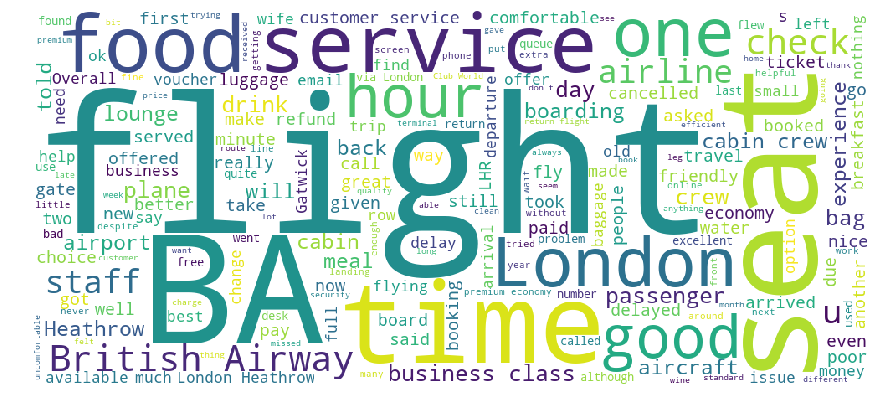

In [16]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

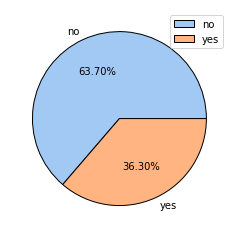

In [17]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

In [18]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Cabin Staff Service,Food & Beverages,Ground Service,Inflight Entertainment,Seat Comfort,Value For Money,Wifi & Connectivity
count,555.000000,462.000000,585.000000,319.000000,562.000000,637.000000,150.000000
mean,2.428829,1.874459,1.941880,2.131661,2.099644,1.613815,1.573333
std,1.329978,1.068904,1.216344,1.216333,1.080057,0.889313,1.070324
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [19]:
data = df_soc[df_soc['reviews'].str.contains('food | drink')]
data['reviews'].to_csv('test.csv')

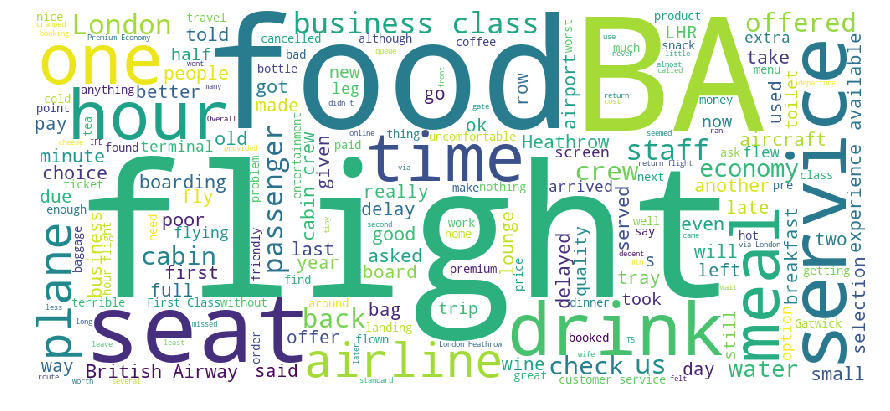

In [20]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [21]:
data = df_soc[df_soc['reviews'].str.contains('money | refund & value')]
data['reviews'].to_csv('test2.csv')

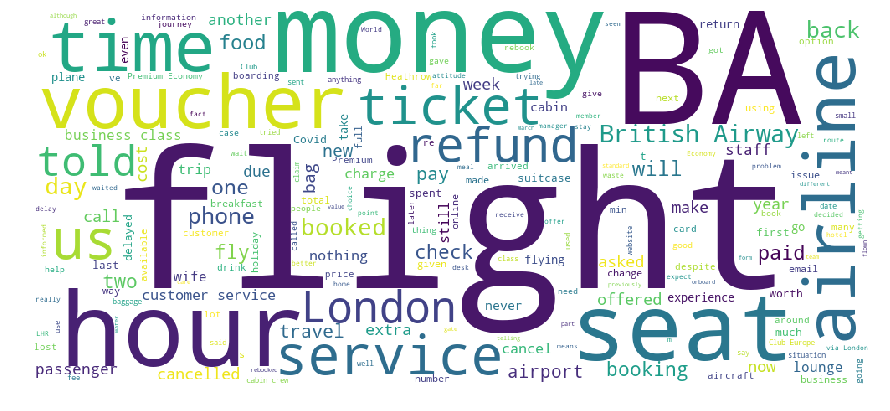

In [22]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wc)
plt.axis("off")
plt.show()